In [37]:
import os
import pandas as pd
import numpy as np

from scipy import stats
data=pd.read_excel('iat1_all.xlsx')
data['correct']=1-data['error']


In [38]:
data=data[data['subj_idx']!=106]
data

,Unnamed: 0,Unnamed: 1,subj_idx,stim4,stim3,stim1,block,condition,stim2,error,...,AD,AUC,xpos_flips,ypos_flips,xpos_reversals,ypos_reversals,RT,initiation_time,idle_time,correct
0,1,id0001,101,NaN,unreal,unreal,1,real/unreal,unreal,0,...,0.252897,0.058596,11,5,3,1,8860,1844,5546,1
1,2,id0002,101,NaN,real,real,1,real/unreal,real,0,...,0.283365,0.737511,4,2,2,0,1890,218,640,1
2,3,id0003,101,NaN,unreal,unreal,1,real/unreal,unreal,0,...,0.008988,0.238636,2,0,1,0,1860,500,734,1
3,4,id0004,101,NaN,real,real,1,real/unreal,real,0,...,0.306168,1.283048,7,6,3,0,2109,78,360,1
4,5,id0005,101,NaN,real,real,1,real/unreal,real,0,...,0.000402,0.064626,0,0,0,0,1562,406,579,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17815,17819,id6796,133,NaN,unreal,unreal,7,incompatible,unreal,0,...,0.042735,0.185899,1,1,1,1,953,31,297,1
17816,17820,id6797,133,NaN,unreal,unreal,7,incompatible,unreal,0,...,0.050063,0.254310,1,0,1,0,875,0,484,1
17817,17821,id6798,133,NaN,unreal,unreal,7,incompatible,unreal,0,...,0.039610,0.294219,1,2,1,2,985,94,578,1
17818,17822,id6799,133,NaN,real,real,7,incompatible,real,0,...,0.383388,0.543347,4,4,4,2,1141,94,454,1


# calculating error rates and d_scores

In [39]:
d=data[(data['block']==4)|(data['block']==7)]


In [92]:
print(stats.pearsonr(d['rt'], d['MAD']))
print(stats.pearsonr(d['rt'], d['AD']))
print(stats.pearsonr(d['rt'], d['AUC']))

(0.17083819769886643, 1.9906829565052758e-84)
(0.20299062650581257, 4.0056860801557227e-119)
(0.07506911025817592, 1.827388351852406e-17)


In [40]:
error=d.groupby(['subj_idx'])['error'].mean()
error=pd.DataFrame(error)
print(error.mean())
error=d.groupby(['subj_idx','condition'])['error'].mean()
error=pd.DataFrame(error)
print(error['error'][:,'compatible'].mean())
print(error['error'][:,'incompatible'].mean())

error    0.124141
dtype: float64
0.032343750000000004
0.2159375


In [41]:
rtmean=d.groupby(['subj_idx','stim3','condition'])['rt'].mean()
rtstd=d.groupby(['subj_idx','stim3'])['rt'].std()
rtmean=pd.DataFrame(rtmean)
rtstd=pd.DataFrame(rtstd)


In [42]:
dscore_ev1=[]
for i in range(33):
    if i==5:
        continue
  
    dscore_ev1.append((rtmean['rt'][i+101,'ev1','compatible']-rtmean['rt'][i+101,'ev1','incompatible'])/rtstd['rt'][i+101,'ev1'])
print(np.mean(dscore_ev1))
print(np.std(dscore_ev1))

-0.3161502269958233
0.3975241635956859


In [43]:
dscore_ev2=[]
for i in range(33):
    if i==5:
        continue
    dscore_ev2.append((rtmean['rt'][i+101,'ev2','compatible']-rtmean['rt'][i+101,'ev2','incompatible'])/rtstd['rt'][i+101,'ev2'])
print(np.mean(dscore_ev2))
print(np.std(dscore_ev2))

-0.1781631554073545
0.4497280056768283


In [44]:
rtmean_overall=d.groupby(['subj_idx','condition'])['rt'].mean()
rtstd_overall=d.groupby(['subj_idx'])['rt'].std()
rtmean_overall=pd.DataFrame(rtmean_overall)
rtstd_overall=pd.DataFrame(rtstd_overall)

In [45]:
dscore=[]
for i in range(33):
    if i==5:
        continue
    dscore.append((rtmean_overall['rt'][i+101,'compatible']-rtmean_overall['rt'][i+101,'incompatible'])/rtstd_overall['rt'][i+101])
print(np.mean(dscore))
print(np.std(dscore))

-0.17887113235556953
0.3458753155863415


In [46]:
dscore

[-0.6552241705449663,
 -0.5052553719739779,
 -0.0204215920292436,
 0.13234365568641923,
 -0.30478496923172904,
 0.267360309818213,
 -0.3553650844447421,
 -0.22678975047415265,
 -0.5567796343456198,
 -0.4443099117164454,
 0.6166995875129562,
 -0.13375599464343577,
 0.3197838038724039,
 0.10887314293982776,
 -0.5524118242902916,
 -0.25452414232461573,
 -0.2952603415405162,
 -0.3141414878187322,
 -0.045296107472468906,
 -1.0669003279420166,
 0.0457607019414127,
 -0.15239651558887768,
 -0.26859548507604836,
 -0.021891335970649968,
 -0.20498851359538925,
 0.1356902603560935,
 -0.6977114471690641,
 0.028656603675248433,
 -0.1682380854899832,
 0.466174268875893,
 -0.20067908206626778,
 -0.39949739430745873]

import os
import pandas as pd
import numpy as np
import pyiat
from scipy import stats
data=pd.read_excel('iat2_all.xlsx')
data['correct']=1-data['error']
d=data[(data['block']==4)|(data['block']==7)]
rtmean_overall=d.groupby(['subj_idx','condition'])['rt'].mean()
rtstd_overall=d.groupby(['subj_idx'])['rt'].std()
rtmean_overall=pd.DataFrame(rtmean_overall)
rtstd_overall=pd.DataFrame(rtstd_overall)
dscore2=[]
for i in range(27):
    if i==18:
        continue
    dscore2.append((rtmean_overall['rt'][i+134,'compatible']-rtmean_overall['rt'][i+134,'incompatible'])/rtstd_overall['rt'][i+134])
print(np.mean(dscore2))
print(np.std(dscore2))


In [47]:
import statsmodels.stats.weightstats as st
 
'''
ttest_ind：独立双样本t检验，
usevar='unequal'两个总体方差不一样
返回的第1个值t是假设检验计算出的（t值），
第2个p_two是双尾检验的p值
第3个df是独立双样本的自由度
'''
t,p_two,df=st.ttest_ind(dscore,dscore2,
                        usevar='unequal')
 
#自由度一般只保留整数部分
print('t=',t,'p_two=',p_two,',df=',df)



t= 3.088265378924336 p_two= 0.003150293569965145 ,df= 55.12745055023299


In [48]:
stats.levene(dscore,dscore2)

LeveneResult(statistic=2.1948335058130546, pvalue=0.14407946664140933)

In [49]:
print(stats.ttest_rel(dscore_ev1,dscore_ev2))




Ttest_relResult(statistic=-1.981071017102924, pvalue=0.05651388551910922)


In [50]:
rtmean_modality=d.groupby(['subj_idx','stim4','condition'])['rt'].mean()
rtstd_modality=d.groupby(['subj_idx','stim4'])['rt'].std()
rtmean_modality=pd.DataFrame(rtmean_modality)
rtstd_modality=pd.DataFrame(rtstd_modality)
rtmean_modality

rt
subj_idx stim4 condition            
101      imag  compatible    1697.60
               incompatible  2329.24
         word  compatible    1832.44
               incompatible  3470.06
102      imag  compatible    1362.46
...                              ...
132      word  incompatible  1166.16
133      imag  compatible    1154.40
               incompatible  1353.66
         word  compatible    1664.64
               incompatible  2983.76

[128 rows x 1 columns]

In [51]:
dscore_word=[]
for i in range(33):
    if i==5:
        continue
    dscore_word.append((rtmean_modality['rt'][i+101,'word','compatible']-rtmean_modality['rt'][i+101,'word','incompatible'])/rtstd_modality['rt'][i+101,'word'])
print(np.mean(dscore_word))
print(np.std(dscore_word))

-0.2836613628590998
0.4224626707435849


In [52]:
len(dscore_word)

32

In [53]:
dscore_imag=[]
for i in range(33):
    if i==5:
        continue
    dscore_imag.append((rtmean_modality['rt'][i+101,'imag','compatible']-rtmean_modality['rt'][i+101,'imag','incompatible'])/rtstd_modality['rt'][i+101,'imag'])
print(np.mean(dscore_imag))
print(np.std(dscore_imag))

-0.21705359864035906
0.3869500623030262


In [54]:
len(dscore_imag)

32

In [55]:
stats.ttest_rel(dscore_word,dscore_imag)


Ttest_relResult(statistic=-1.117558216843618, pvalue=0.27234225359981407)

In [56]:
stats.ttest_rel(dscore_word,[0 for i in range(32)])

Ttest_relResult(statistic=-3.738459600368547, pvalue=0.0007513739589891341)

In [57]:
stats.ttest_rel(dscore_imag,[0 for i in range(32)])

Ttest_relResult(statistic=-3.123150527851332, pvalue=0.003860966581100387)

# RT

In [58]:
data1=data[(data.block==4)|(data.block==7)]

data1=data1[data1['correct']==1]
data1=data1[data1['rt']<5000]

In [59]:
RT =pd.DataFrame(columns=('subj_idx','total_com','total_incom','ev1_com','ev1_incom','ev2_com','ev2_incom','ev1_imag_com','ev1_imag_incom','ev1_word_com','ev1_word_incom','ev2_imag_com','ev2_imag_com','ev2_word_com','ev2_word_com'))
RT.subj_idx=range(101,134)
for i in range(101,134):
    
    RT.iloc[i-101,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-101,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-101,3]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-101,4]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-101,5]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-101,6]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-101,7]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-101,8]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-101,9]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-101,10]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-101,11]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-101,12]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-101,13]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-101,14]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='incompatible')].RT.mean()

RT=RT[RT['subj_idx']!=106]
RT

,subj_idx,total_com,total_incom,ev1_com,ev1_incom,ev2_com,ev2_incom,ev1_imag_com,ev1_imag_incom,ev1_word_com,ev1_word_incom,ev2_imag_com,ev2_imag_com,ev2_word_com,ev2_word_com
0,101,1728.04,2661.32,1561.52,2328.94,1743.88,NaN,1436.2,NaN,1686.84,2328.94,1689.42,NaN,1798.33,NaN
1,102,1378.09,1548.31,1478.09,1587.53,1258.72,1535.86,1474.94,1508.35,1482.14,1691.08,1238.76,1565.17,1278.68,1513.88
2,103,1697.3,1679.84,1913.59,1975.39,1487.12,1538.89,1812.36,2077.75,2099.17,1958.33,1395.68,1267.57,1578.56,1810.21
3,104,1284.14,1246.4,1362.46,1278.33,1198.76,1217.04,1254.88,1250.04,1470.04,1441,1163.28,1169.83,1235.71,1264.26
4,105,1103,1191.3,1118.92,1266.18,1132.22,1195.33,1075.64,996,1164,1326.22,1114.4,1096.33,1150.04,1294.33
6,107,1364.33,1226.54,1264.88,1301.98,1438.1,1319.55,1158.44,1353.59,1371.32,1245.2,1288.08,1288.7,1594.38,1349.12
7,108,1698.78,1974.6,1699.4,1939.31,1641.44,1747.68,1423.16,1751.7,1975.64,2056.56,1492,1683.27,1828.25,1836.25
8,109,1339.69,1417.16,1290.04,1496.38,1186.22,1649.58,1417.08,1592,1163,1428.88,1160.56,1571.92,1211.88,1716.14
9,110,1108.76,1405.22,1039.32,1311.27,1094.15,NaN,1035.04,1422.5,1043.6,1302,980.72,NaN,1217.43,NaN
10,111,1178.67,1551.42,1264.16,1583.27,1183.29,1520,1058.24,1276.41,1470.08,2162.89,1036.36,1279.89,1336.33,1824.13


In [80]:
print(RT.total_com.mean())
print(RT.total_com.std())
print(RT.total_incom.mean())
print(RT.total_incom.std())

1325.95613050385
225.2189631183819
1417.5914290928968
338.4387456269863


In [60]:
print(stats.ttest_rel(RT.total_com,RT.total_incom))


print(stats.ttest_rel(RT.loc[:,['ev1_com','ev1_incom']].dropna().ev1_com,RT.loc[:,['ev1_com','ev1_incom']].dropna().ev1_incom))
print(stats.ttest_rel(RT.loc[:,['ev2_com','ev2_incom']].dropna().ev2_com,RT.loc[:,['ev2_com','ev2_incom']].dropna().ev2_incom))
print(stats.ttest_rel(RT.loc[:,['ev1_com','ev2_com']].dropna().ev1_com,RT.loc[:,['ev1_com','ev2_com']].dropna().ev2_com))
print(stats.ttest_rel(RT.loc[:,['ev1_incom','ev2_incom']].dropna().ev1_incom,RT.loc[:,['ev1_incom','ev2_incom']].dropna().ev2_incom))

Ttest_relResult(statistic=-2.1312504276545603, pvalue=0.0411036868553224)
Ttest_relResult(statistic=-4.449627607443668, pvalue=0.00010961412026879275)
Ttest_relResult(statistic=-1.2546955624664722, pvalue=0.21996177802793207)
Ttest_relResult(statistic=0.9267397543089121, pvalue=0.3614576958415018)
Ttest_relResult(statistic=2.709135619301008, pvalue=0.011378925473464668)


# AUC


In [61]:
AUC =pd.DataFrame(columns=('subj_idx','total_com','total_incom','ev1_com','ev1_incom','ev2_com','ev2_incom','ev1_imag_com','ev1_imag_incom','ev1_word_com','ev1_word_incom','ev2_imag_com','ev2_imag_com','ev2_word_com','ev2_word_com'))
AUC.subj_idx=range(101,134)
for i in range(101,134):
    AUC.iloc[i-101,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-101,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-101,3]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-101,4]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-101,5]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-101,6]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-101,7]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-101,8]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-101,9]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-101,10]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-101,11]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-101,12]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-101,13]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-101,14]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='incompatible')].AUC.mean()

AUC=AUC[AUC['subj_idx']!=106]
AUC

,subj_idx,total_com,total_incom,ev1_com,ev1_incom,ev2_com,ev2_incom,ev1_imag_com,ev1_imag_incom,ev1_word_com,ev1_word_incom,ev2_imag_com,ev2_imag_com,ev2_word_com,ev2_word_com
0,101,0.220054,0.309531,0.179924,0.160095,0.118338,NaN,0.198956,NaN,0.160892,0.160095,0.090208,NaN,0.146468,NaN
1,102,0.291277,0.340261,0.370665,0.288731,0.17659,0.290236,0.289804,0.237109,0.474629,0.356237,0.139115,0.261894,0.214064,0.311492
2,103,0.177698,0.203211,0.451994,0.169593,0.0652707,0.0627108,0.575072,0.617232,0.226351,0.0949862,0.0152883,0.00896517,0.115253,0.116456
3,104,0.0178585,0.05416,0.0285775,0.0747254,-0.0435874,-0.0104991,0.00552685,0.0497203,0.0516282,0.218505,-0.0491682,-0.0113877,-0.0377741,-0.00961056
4,105,0.267616,0.311087,0.251615,0.343882,0.174779,0.154676,0.199923,0.224526,0.305461,0.370406,0.152872,0.0664537,0.196686,0.242898
6,107,0.400146,0.431087,0.232354,0.289261,0.532465,0.674271,0.1633,0.0777974,0.301408,0.521871,0.436413,0.602107,0.632519,0.743428
7,108,0.274658,0.352167,0.116041,0.358619,0.399767,0.570445,0.0563546,0.245807,0.175728,0.429126,0.341672,0.547929,0.472385,0.601405
8,109,0.190847,0.204441,0.101403,0.248051,0.128358,0.315286,0.0443161,0.154064,0.158489,0.314395,0.0610244,0.33901,0.195691,0.29495
9,110,0.36653,0.481398,0.227253,0.438517,0.416728,NaN,0.265007,0.0331475,0.189499,0.472297,0.306736,NaN,0.536285,NaN
10,111,0.410947,0.380599,0.422158,0.416097,0.420679,0.274988,0.388646,0.381749,0.45567,0.480976,0.437979,0.229017,0.402658,0.333217


In [62]:
AUC=AUC[AUC['subj_idx']!=106]

In [85]:
print(AUC.total_com.mean())
print(AUC.total_com.std())
print(AUC.total_incom.mean())
print(AUC.total_incom.std())

0.28203097620745093
0.10200919919522233
0.29875749052867956
0.09529843630698843


In [63]:
#配对t-test
print(stats.ttest_rel(AUC.total_com,AUC.total_incom))


print(stats.ttest_rel(AUC.loc[:,['ev1_com','ev1_incom']].dropna().ev1_com,AUC.loc[:,['ev1_com','ev1_incom']].dropna().ev1_incom))
print(stats.ttest_rel(AUC.loc[:,['ev2_com','ev2_incom']].dropna().ev2_com,AUC.loc[:,['ev2_com','ev2_incom']].dropna().ev2_incom))
print(stats.ttest_rel(AUC.loc[:,['ev1_com','ev2_com']].dropna().ev1_com,AUC.loc[:,['ev1_com','ev2_com']].dropna().ev2_com))
print(stats.ttest_rel(AUC.loc[:,['ev1_incom','ev2_incom']].dropna().ev1_incom,AUC.loc[:,['ev1_incom','ev2_incom']].dropna().ev2_incom))

Ttest_relResult(statistic=-1.412257191251267, pvalue=0.16783484253188946)
Ttest_relResult(statistic=-0.5644636847871172, pvalue=0.5766350561069846)
Ttest_relResult(statistic=1.3658472268814017, pvalue=0.18285860179871916)
Ttest_relResult(statistic=0.2829696286908916, pvalue=0.7791435363662401)
Ttest_relResult(statistic=1.5088030684472769, pvalue=0.14255143518440863)


# MAD

In [64]:
MAD =pd.DataFrame(columns=('subj_idx','total_com','total_incom','ev1_com','ev1_incom','ev2_com','ev2_incom','ev1_imag_com','ev1_imag_incom','ev1_word_com','ev1_word_incom','ev2_imag_com','ev2_imag_com','ev2_word_com','ev2_word_com'))
MAD.subj_idx=range(101,134)
for i in range(101,134):
    MAD.iloc[i-101,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-101,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-101,3]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-101,4]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-101,5]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-101,6]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-101,7]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-101,8]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-101,9]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-101,10]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-101,11]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-101,12]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-101,13]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-101,14]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='incompatible')].MAD.mean()

MAD=MAD[MAD['subj_idx']!=106]

MAD

,subj_idx,total_com,total_incom,ev1_com,ev1_incom,ev2_com,ev2_incom,ev1_imag_com,ev1_imag_incom,ev1_word_com,ev1_word_incom,ev2_imag_com,ev2_imag_com,ev2_word_com,ev2_word_com
0,101,0.295763,0.4935,0.245345,0.234565,0.165782,NaN,0.235555,NaN,0.255134,0.234565,0.130349,NaN,0.201215,NaN
1,102,0.442288,0.552117,0.544765,0.421017,0.210283,0.488177,0.477879,0.354359,0.630763,0.508187,0.174691,0.400394,0.245876,0.554015
2,103,0.319498,0.338285,0.688497,0.34102,0.121601,0.143365,0.736662,0.939068,0.600195,0.241345,0.023066,-0.000798385,0.220136,0.287528
3,104,0.0214991,0.0754108,0.0326974,0.0902693,-0.0657905,-0.0275854,-0.00724464,0.0547071,0.0726395,0.294752,-0.0806096,-0.0343588,-0.0503538,-0.020812
4,105,0.352712,0.451692,0.304643,0.561128,0.244972,0.197041,0.235487,0.245122,0.376681,0.631352,0.202958,0.0683599,0.286986,0.325722
6,107,0.616397,0.666115,0.47999,0.625405,0.734064,0.773735,0.338924,0.614542,0.621056,0.637354,0.550869,0.730724,0.924891,0.814955
7,108,0.38938,0.528094,0.191937,0.583918,0.5331,0.792674,0.0719883,0.603335,0.311887,0.571782,0.435065,0.70413,0.655644,0.914422
8,109,0.297511,0.297223,0.211964,0.359771,0.166043,0.379994,0.125418,0.336044,0.29851,0.376519,0.0699514,0.381847,0.262135,0.378406
9,110,0.519144,0.892597,0.30599,0.790629,0.589396,NaN,0.340893,0.776554,0.271087,0.791802,0.401904,NaN,0.793191,NaN
10,111,0.659168,0.670542,0.736918,0.705592,0.584006,0.489512,0.593379,0.597994,0.880456,0.908832,0.51088,0.317912,0.660179,0.706873


In [65]:
mad_mean=MAD.mean()
mad_mean

subj_idx          117.343750
total_com           0.432355
total_incom         0.475907
ev1_com             0.406727
ev1_incom           0.462893
ev2_com             0.393375
ev2_incom           0.358167
ev1_imag_com        0.339202
ev1_imag_incom      0.517759
ev1_word_com        0.474854
ev1_word_incom      0.472134
ev2_imag_com        0.318871
ev2_imag_com        0.320478
ev2_word_com        0.472116
ev2_word_com        0.416252
dtype: float64

In [66]:
mad_std=MAD.std()
mad_std

subj_idx          9.617220
total_com         0.177290
total_incom       0.178176
ev1_com           0.187559
ev1_incom         0.226346
ev2_com           0.262892
ev2_incom         0.214952
ev1_imag_com      0.196033
ev1_imag_incom    0.342946
ev1_word_com      0.211188
ev1_word_incom    0.232166
ev2_imag_com      0.248138
ev2_imag_com      0.279826
ev2_word_com      0.296621
ev2_word_com      0.271679
dtype: float64

In [67]:
print(stats.ttest_rel(MAD.total_com,MAD.total_incom))

Ttest_relResult(statistic=-1.991341721428104, pvalue=0.05531806297746299)


In [68]:
#配对t-test


print(stats.ttest_rel(MAD.loc[:,['ev1_com','ev1_incom']].dropna().ev1_com,MAD.loc[:,['ev1_com','ev1_incom']].dropna().ev1_incom))
print(stats.ttest_rel(MAD.loc[:,['ev2_com','ev2_incom']].dropna().ev2_com,MAD.loc[:,['ev2_com','ev2_incom']].dropna().ev2_incom))
print(stats.ttest_rel(MAD.loc[:,['ev1_com','ev2_com']].dropna().ev1_com,MAD.loc[:,['ev1_com','ev2_com']].dropna().ev2_com))
print(stats.ttest_rel(MAD.loc[:,['ev1_incom','ev2_incom']].dropna().ev1_incom,MAD.loc[:,['ev1_incom','ev2_incom']].dropna().ev2_incom))

Ttest_relResult(statistic=-1.8191127206073698, pvalue=0.07888901290034253)
Ttest_relResult(statistic=1.1767314522023269, pvalue=0.2492098236956375)
Ttest_relResult(statistic=0.2749454295022652, pvalue=0.785242889054895)
Ttest_relResult(statistic=2.2437237066468283, pvalue=0.03294205877755464)


# AD

In [69]:
AD =pd.DataFrame(columns=('subj_idx','total_com','total_incom','ev1_com','ev1_incom','ev2_com','ev2_incom','ev1_imag_com','ev1_imag_incom','ev1_word_com','ev1_word_incom','ev2_imag_com','ev2_imag_com','ev2_word_com','ev2_word_com'))
AD.subj_idx=range(101,134)
for i in range(101,134):
    AD.iloc[i-101,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-101,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-101,3]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-101,4]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-101,5]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-101,6]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-101,7]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-101,8]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-101,9]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-101,10]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-101,11]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-101,12]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-101,13]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-101,14]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='incompatible')].AD.mean()

AD=AD[AD['subj_idx']!=106]

AD

,subj_idx,total_com,total_incom,ev1_com,ev1_incom,ev2_com,ev2_incom,ev1_imag_com,ev1_imag_incom,ev1_word_com,ev1_word_incom,ev2_imag_com,ev2_imag_com,ev2_word_com,ev2_word_com
0,101,0.0678292,0.133111,0.0684779,0.0587929,0.0392659,NaN,0.0534652,NaN,0.0834906,0.0587929,0.0353379,NaN,0.0431938,NaN
1,102,0.119965,0.149696,0.151253,0.103841,0.0511678,0.137284,0.120019,0.0953092,0.191412,0.114998,0.0443268,0.153108,0.0580089,0.125417
2,103,0.0868453,0.1009,0.210666,0.113407,0.0285631,0.0467574,0.240155,0.361653,0.156603,0.072033,0.00487005,0.00869588,0.0522562,0.084819
3,104,0.00738387,0.020532,0.00640371,0.023766,-0.0117519,-0.00286803,-0.00151912,0.0108061,0.0143265,0.0982855,-0.0135114,-0.00169572,-0.00991913,-0.00404034
4,105,0.0746991,0.104966,0.0567862,0.135985,0.0496382,0.0507525,0.0415598,0.060963,0.0726471,0.152657,0.0385355,0.00814873,0.0607409,0.0933562
6,107,0.139101,0.135232,0.102633,0.137491,0.160677,0.125862,0.0490879,0.137645,0.156179,0.137321,0.0755976,0.121485,0.249301,0.130055
7,108,0.138885,0.209301,0.0629373,0.226401,0.188518,0.332141,0.0213729,0.155996,0.104502,0.270405,0.148001,0.292983,0.239166,0.385983
8,109,0.0726349,0.0630293,0.0603797,0.0775931,0.0301315,0.0829611,0.0577577,0.0751482,0.0630017,0.0793189,0.013832,0.0788044,0.0464311,0.086524
9,110,0.149091,0.258835,0.0859177,0.213431,0.168777,NaN,0.0950921,0.105083,0.0767434,0.22246,0.0998524,NaN,0.243695,NaN
10,111,0.194096,0.205401,0.232779,0.213674,0.159464,0.156892,0.167238,0.171652,0.29832,0.293049,0.135484,0.103446,0.184444,0.22459


In [70]:
AD.mean()

subj_idx          117.343750
total_com           0.117917
total_incom         0.133653
ev1_com             0.110525
ev1_incom           0.131157
ev2_com             0.108026
ev2_incom           0.099008
ev1_imag_com        0.089175
ev1_imag_incom      0.143525
ev1_word_com        0.131817
ev1_word_incom      0.135727
ev2_imag_com        0.083252
ev2_imag_com        0.085382
ev2_word_com        0.134240
ev2_word_com        0.118541
dtype: float64

In [71]:
AD.std()

subj_idx          9.617220
total_com         0.055135
total_incom       0.058412
ev1_com           0.063063
ev1_incom         0.073362
ev2_com           0.077983
ev2_incom         0.067230
ev1_imag_com      0.063199
ev1_imag_incom    0.104737
ev1_word_com      0.078589
ev1_word_incom    0.078930
ev2_imag_com      0.069821
ev2_imag_com      0.083923
ev2_word_com      0.093321
ev2_word_com      0.082681
dtype: float64

In [72]:
print(stats.ttest_rel(AD.total_com,AD.total_incom))
print(stats.ttest_rel(AD.loc[:,['ev1_com','ev1_incom']].dropna().ev1_com,AD.loc[:,['ev1_com','ev1_incom']].dropna().ev1_incom))
print(stats.ttest_rel(AD.loc[:,['ev2_com','ev2_incom']].dropna().ev2_com,AD.loc[:,['ev2_com','ev2_incom']].dropna().ev2_incom))
print(stats.ttest_rel(AD.loc[:,['ev1_com','ev2_com']].dropna().ev1_com,AD.loc[:,['ev1_com','ev2_com']].dropna().ev2_com))
print(stats.ttest_rel(AD.loc[:,['ev1_incom','ev2_incom']].dropna().ev1_incom,AD.loc[:,['ev1_incom','ev2_incom']].dropna().ev2_incom))


Ttest_relResult(statistic=-2.338828966904693, pvalue=0.025967202620930052)
Ttest_relResult(statistic=-1.938901274003366, pvalue=0.061970747667175245)
Ttest_relResult(statistic=0.9727672530286139, pvalue=0.338998269192915)
Ttest_relResult(statistic=0.15212362530945206, pvalue=0.8801079038919576)
Ttest_relResult(statistic=2.362306268639405, pvalue=0.025346279918711336)


# linear mixed effect models

In [73]:
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels
data1

,Unnamed: 0,Unnamed: 1,subj_idx,stim4,stim3,stim1,block,condition,stim2,error,...,AD,AUC,xpos_flips,ypos_flips,xpos_reversals,ypos_reversals,RT,initiation_time,idle_time,correct
2640,2642,0,101,NaN,real,real,4,compatible,real,0,...,-0.012058,-0.051148,0,2,0,0,3125,921,2374,1
2641,2643,1,101,word,ev1,ev1_word,4,compatible,ev1_word_real,0,...,-0.011918,0.047250,1,0,0,0,2281,875,1671,1
2642,2644,2,101,word,ev2,ev2_word,4,compatible,ev2_word_unreal,0,...,-0.010399,-0.062450,0,0,0,0,2422,1453,2031,1
2643,2645,3,101,imag,ev2,ev2_imag,4,compatible,ev2_imag_unreal,0,...,0.014758,0.183083,2,2,0,0,1203,578,751,1
2644,2646,4,101,word,ev1,ev1_word,4,compatible,ev1_word_real,0,...,0.037673,0.299585,3,0,1,0,1094,0,593,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17815,17819,id6796,133,NaN,unreal,unreal,7,incompatible,unreal,0,...,0.042735,0.185899,1,1,1,1,953,31,297,1
17816,17820,id6797,133,NaN,unreal,unreal,7,incompatible,unreal,0,...,0.050063,0.254310,1,0,1,0,875,0,484,1
17817,17821,id6798,133,NaN,unreal,unreal,7,incompatible,unreal,0,...,0.039610,0.294219,1,2,1,2,985,94,578,1
17818,17822,id6799,133,NaN,real,real,7,incompatible,real,0,...,0.383388,0.543347,4,4,4,2,1141,94,454,1


In [74]:
import pingouin
pingouin.anova(data=data1, dv='rt', between=['stim3','condition'], ss_type=2, detailed=False, effsize='np2')

/Library/anaconda3/lib/python3.7/site-packages/dask/config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Library/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


,Source,SS,DF,MS,F,p-unc,np2
0,stim3,7.256099e+06,3.0,2.418700e+06,7.198030,7.999299e-05,0.001947
1,condition,1.099759e+07,1.0,1.099759e+07,32.728735,1.087069e-08,0.002948
2,stim3 * condition,1.158569e+07,3.0,3.861898e+06,11.492978,1.609860e-07,0.003105
3,Residual,3.719768e+09,11070.0,3.360224e+05,NaN,NaN,NaN


In [75]:
formula = 'RT~C(stim3)*C(condition)'

anova_inter = sm.stats.anova_lm(smf.ols('RT~C(stim3)*C(condition)', data = data1).fit())  # dc_sales_est 是一个模型对象
anova_inter

,df,sum_sq,mean_sq,F,PR(>F)
C(stim3),3.0,7.810600e+06,2.603533e+06,7.749606,3.624018e-05
C(condition),1.0,1.101507e+07,1.101507e+07,32.787143,1.054984e-08
C(stim3):C(condition),3.0,1.155497e+07,3.851657e+06,11.464736,1.677354e-07
Residual,11070.0,3.719043e+09,3.359569e+05,NaN,NaN


In [76]:
pingouin.anova(data=data1, dv='rt', between=['condition','stim3','stim4'], ss_type=2, detailed=False, effsize='np2')

,Source,SS,DF,MS,F,p-unc,np2
0,condition,4.516672e+06,1.0,4.516672e+06,14.629729,1.324596e-04,0.002974
1,stim3,5.383391e+06,1.0,5.383391e+06,17.437075,3.021299e-05,0.003543
2,stim4,3.895744e+07,1.0,3.895744e+07,126.185094,6.300908e-29,0.025086
3,condition * stim3,6.624922e+06,1.0,6.624922e+06,21.458456,3.709359e-06,0.004357
4,condition * stim4,1.368583e+06,1.0,1.368583e+06,4.432908,3.530311e-02,0.000903
5,stim3 * stim4,4.797737e+05,1.0,4.797737e+05,1.554011,2.126038e-01,0.000317
6,condition * stim3 * stim4,4.627785e+05,1.0,4.627785e+05,1.498963,2.208898e-01,0.000306
7,Residual,1.514024e+09,4904.0,3.087325e+05,NaN,NaN,NaN


In [77]:
statsmodels.stats.anova.AnovaRM(data=data1,depvar='rt', subject='subj_idx', within=['condition','stim3','stim4'], aggregate_func=callable)

/Library/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Library/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.9, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


ValueError: Data is unbalanced.

In [ ]:
pingouin.pairwise_ttests(data=data1, dv='rt', between=['condition','stim4'],alpha=0.05, padjust='bonf',subject='subj_idx')

,Contrast,condition,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,condition,-,compatible,incompatible,False,True,-5.759347,9733.017620,two-sided,8.700074e-09,NaN,NaN,3.28e+05,-0.111973
1,stim4,-,imag,word,False,True,-11.476890,4552.892061,two-sided,4.452129e-30,NaN,NaN,4.514e+26,-0.327272
2,condition * stim4,compatible,imag,word,False,True,-7.998407,2797.478350,two-sided,1.827451e-15,3.654902e-15,bonf,1.979e+12,-0.292192
3,condition * stim4,incompatible,imag,word,False,True,-8.184650,1776.153942,two-sided,5.151163e-16,1.030233e-15,bonf,8.104e+12,-0.372819


In [ ]:
#anova:RT~2(congruency)*2(ev1/ev2)*2(word/imag)####！
formula1 = 'rt~C(condition)*C(stim3)*C(stim4)'

anova1 = sm.stats.anova_lm(smf.ols(formula1,data = data1).fit())  
anova1

,df,sum_sq,mean_sq,F,PR(>F)
C(condition),1.0,5.076218e+06,5.076218e+06,16.442127,5.093601e-05
C(stim3),3.0,6.313761e+06,2.104587e+06,6.816863,1.395578e-04
C(stim4),1.0,3.992727e+07,3.992727e+07,129.326443,1.347298e-29
C(condition):C(stim3),3.0,7.140774e+06,2.380258e+06,7.709775,3.891210e-05
C(condition):C(stim4),1.0,1.307670e+06,1.307670e+06,4.235610,3.963712e-02
C(stim3):C(stim4),3.0,5.066251e+05,1.688750e+05,0.546995,6.501572e-01
C(condition):C(stim3):C(stim4),3.0,7.109764e+05,2.369921e+05,0.767629,5.120263e-01
Residual,4904.0,1.514024e+09,3.087325e+05,NaN,NaN


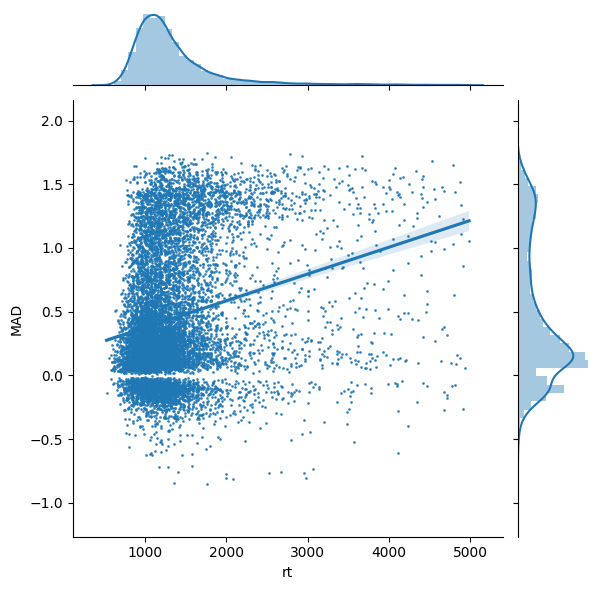

In [96]:
import seaborn as sns
sns.jointplot(data=data1, x="rt", y="MAD", kind="reg",scatter_kws={'s': 1})
plt.show()

# visualization-mouse indices

In [ ]:

data2=data1[(data1['stim1'] != 'real')&(data1['stim1']!='unreal')]
data2.iloc[:,16:26]
len(data2)

4912

In [ ]:
data2

,Unnamed: 0,Unnamed: 1,subj_idx,stim4,stim3,stim1,block,condition,stim2,error,...,AD,AUC,xpos_flips,ypos_flips,xpos_reversals,ypos_reversals,RT,initiation_time,idle_time,correct
2641,2643,1,101,word,ev1,ev1_word,4,compatible,ev1_word_real,0,...,-0.011918,0.047250,1,0,0,0,2281,875,1671,1
2642,2644,2,101,word,ev2,ev2_word,4,compatible,ev2_word_unreal,0,...,-0.010399,-0.062450,0,0,0,0,2422,1453,2031,1
2643,2645,3,101,imag,ev2,ev2_imag,4,compatible,ev2_imag_unreal,0,...,0.014758,0.183083,2,2,0,0,1203,578,751,1
2644,2646,4,101,word,ev1,ev1_word,4,compatible,ev1_word_real,0,...,0.037673,0.299585,3,0,1,0,1094,0,593,1
2652,2654,12,101,imag,ev2,ev2_imag,4,compatible,ev2_imag_unreal,0,...,-0.000894,-0.003717,1,1,0,0,1578,953,1312,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17810,17814,id6791,133,imag,ev2,ev2_imag,7,incompatible,ev2_imag_real,0,...,0.027267,0.096508,1,2,1,0,860,0,391,1
17811,17815,id6792,133,imag,ev2,ev2_imag,7,incompatible,ev2_imag_real,0,...,0.023621,0.206003,1,2,1,2,906,47,454,1
17812,17816,id6793,133,word,ev1,ev1_word,7,incompatible,ev1_word_unreal,0,...,-0.020490,0.072168,4,3,2,1,1344,31,688,1
17813,17817,id6794,133,word,ev2,ev2_word,7,incompatible,ev2_word_real,0,...,0.136039,0.169922,3,2,3,0,1844,63,641,1


In [ ]:

import matplotlib
matplotlib.use('Agg')
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,7),dpi=200);


data_com=data2[data2['condition']=='compatible']
a1=sns.barplot(x='stim3',y='RT',hue='stim4',data=data_com,capsize=0.05,errwidth=2,ci=50,palette='BuGn_r');


a1.tick_params(labelsize=7)
plt.ylim([1000,2000])
plt.yticks([1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000])

plt.ylim([1000,1850])



plt.show()
plt.savefig('fig1b_com.png')

In [ ]:
plt.figure(figsize=(5,7),dpi=200);


data_incom=data2[data2['condition']=='incompatible']
a1=sns.barplot(x='stim3',y='RT',hue='stim4',data=data_incom,capsize=0.05,errwidth=2,ci=50,palette='Blues_r');


a1.tick_params(labelsize=7)
plt.ylim([1000,2000])
plt.yticks([1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000])

plt.ylim([1000,1850])



plt.show()
plt.savefig('fig1b_incom.png')

# pic-word analysis

In [ ]:
RT =pd.DataFrame(columns=('subj_idx','total_com','total_incom','imag_com','imag_incom','word_com','word_incom'))
RT.subj_idx=range(101,134)
for i in range(101,134):
    
    RT.iloc[i-101,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-101,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-101,3]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-101,4]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-101,5]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-101,6]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='incompatible')].RT.mean()
    

RT=RT[RT['subj_idx']!=106]
RT

,subj_idx,total_com,total_incom,imag_com,imag_incom,word_com,word_incom
0,101,1728.04,2661.32,1560.22,NaN,1741.45,2328.94
1,102,1378.09,1548.31,1337.63,1531.86,1351.72,1593.31
2,103,1697.3,1679.84,1523,1447.61,1679.32,1903.76
3,104,1284.14,1246.4,1209.08,1209.93,1355.27,1290.44
4,105,1103,1191.3,1095.02,1071.25,1156.88,1313.47
6,107,1364.33,1226.54,1223.26,1320.42,1480.57,1301.89
7,108,1698.78,1974.6,1457.58,1715.86,1910.13,1983.12
8,109,1339.69,1417.16,1288.82,1581.96,1187.44,1558.61
9,110,1108.76,1405.22,1007.88,1422.5,1126.9,1302
10,111,1178.67,1551.42,1047.3,1278.25,1404.57,1951.17


In [ ]:
RT.mean()

subj_idx        117.343750
total_com      1325.956131
total_incom    1417.591429
imag_com       1240.682132
imag_incom     1300.934099
word_com       1396.687619
word_incom     1532.549239
dtype: float64

In [ ]:
RT.std()

subj_idx         9.617220
total_com      225.218963
total_incom    338.438746
imag_com       187.484357
imag_incom     254.242049
word_com       250.081397
word_incom     340.628697
dtype: float64

In [ ]:
print(stats.ttest_rel(RT.total_com,RT.total_incom))


print(stats.ttest_rel(RT.loc[:,['imag_com','imag_incom']].dropna().imag_com,RT.loc[:,['imag_com','imag_incom']].dropna().imag_incom))
print(stats.ttest_rel(RT.loc[:,['word_com','word_incom']].dropna().word_com,RT.loc[:,['word_com','word_incom']].dropna().word_incom))


Ttest_relResult(statistic=-2.1312504276545603, pvalue=0.0411036868553224)
Ttest_relResult(statistic=-1.8842953207541293, pvalue=0.06924786031150412)
Ttest_relResult(statistic=-3.163497676031191, pvalue=0.003479068240420652)


In [ ]:
MAD =pd.DataFrame(columns=('subj_idx','total_com','total_incom','imag_com','imag_incom','word_com','word_incom'))
MAD.subj_idx=range(101,134)
for i in range(101,134):
    
    MAD.iloc[i-101,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-101,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-101,3]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-101,4]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-101,5]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-101,6]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='incompatible')].MAD.mean()
    

MAD=MAD[MAD['subj_idx']!=106]
MAD

,subj_idx,total_com,total_incom,imag_com,imag_incom,word_com,word_incom
0,101,0.295763,0.4935,0.184026,NaN,0.228725,0.234565
1,102,0.442288,0.552117,0.301607,0.373408,0.384041,0.533471
2,103,0.319498,0.338285,0.241109,0.208061,0.293696,0.25836
3,104,0.0214991,0.0754108,-0.0439271,0.0101741,0.0123979,0.0259383
4,105,0.352712,0.451692,0.219223,0.112551,0.330918,0.5091
6,107,0.616397,0.666115,0.444897,0.673924,0.769873,0.734227
7,108,0.38938,0.528094,0.253527,0.656133,0.464668,0.685996
8,109,0.297511,0.297223,0.0976848,0.358945,0.280323,0.377371
9,110,0.519144,0.892597,0.371398,0.776554,0.521262,0.791802
10,111,0.659168,0.670542,0.55213,0.450173,0.772565,0.782608


In [ ]:
print(stats.ttest_rel(MAD.total_com,MAD.total_incom))


print(stats.ttest_rel(MAD.loc[:,['imag_com','imag_incom']].dropna().imag_com,MAD.loc[:,['imag_com','imag_incom']].dropna().imag_incom))
print(stats.ttest_rel(MAD.loc[:,['word_com','word_incom']].dropna().word_com,MAD.loc[:,['word_com','word_incom']].dropna().word_incom))


Ttest_relResult(statistic=-1.991341721428104, pvalue=0.05531806297746299)
Ttest_relResult(statistic=-1.769786761427084, pvalue=0.0869272826212127)
Ttest_relResult(statistic=0.6019557185420067, pvalue=0.5515812184720352)


In [ ]:
AD =pd.DataFrame(columns=('subj_idx','total_com','total_incom','imag_com','imag_incom','word_com','word_incom'))
AD.subj_idx=range(101,134)
for i in range(101,134):
    
    AD.iloc[i-101,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-101,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-101,3]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-101,4]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-101,5]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-101,6]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='incompatible')].AD.mean()
    

AD=AD[AD['subj_idx']!=106]
AD

,subj_idx,total_com,total_incom,imag_com,imag_incom,word_com,word_incom
0,101,0.0678292,0.133111,0.0445865,NaN,0.0637534,0.0587929
1,102,0.119965,0.149696,0.076012,0.119226,0.105897,0.120747
2,103,0.0868453,0.1009,0.0767627,0.0871307,0.0724524,0.0767436
3,104,0.00738387,0.020532,-0.00751526,0.00455518,0.0024511,0.0111191
4,105,0.0746991,0.104966,0.0400476,0.0213523,0.0665725,0.128937
6,107,0.139101,0.135232,0.0623428,0.129386,0.201789,0.133358
7,108,0.138885,0.209301,0.0846867,0.227751,0.164352,0.308931
8,109,0.0726349,0.0630293,0.0357949,0.0769763,0.0547164,0.0825728
9,110,0.149091,0.258835,0.0974722,0.105083,0.156741,0.22246
10,111,0.194096,0.205401,0.151361,0.135655,0.242544,0.250262


In [ ]:
print(stats.ttest_rel(AD.total_com,AD.total_incom))


print(stats.ttest_rel(AD.loc[:,['imag_com','imag_incom']].dropna().imag_com,AD.loc[:,['imag_com','imag_incom']].dropna().imag_incom))
print(stats.ttest_rel(AD.loc[:,['word_com','word_incom']].dropna().word_com,AD.loc[:,['word_com','word_incom']].dropna().word_incom))


Ttest_relResult(statistic=-2.338828966904693, pvalue=0.025967202620930052)
Ttest_relResult(statistic=-2.178969792873559, pvalue=0.037320617938916174)
Ttest_relResult(statistic=0.40917644780411294, pvalue=0.6852235455333227)


In [ ]:
AUC =pd.DataFrame(columns=('subj_idx','total_com','total_incom','imag_com','imag_incom','word_com','word_incom'))
AUC.subj_idx=range(101,134)
for i in range(101,134):
    
    AUC.iloc[i-101,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-101,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-101,3]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-101,4]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-101,5]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-101,6]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='incompatible')].AUC.mean()
    

AUC=AUC[AUC['subj_idx']!=106]
AUC

,subj_idx,total_com,total_incom,imag_com,imag_incom,word_com,word_incom
0,101,0.220054,0.309531,0.145692,NaN,0.153827,0.160095
1,102,0.291277,0.340261,0.202194,0.247365,0.3076,0.33155
2,103,0.177698,0.203211,0.186333,0.144136,0.136756,0.102896
3,104,0.0178585,0.05416,-0.0218207,0.0191663,0.00783935,0.0241843
4,105,0.267616,0.311087,0.176398,0.105972,0.249964,0.319403
6,107,0.400146,0.431087,0.299856,0.345778,0.463585,0.64272
7,108,0.274658,0.352167,0.199013,0.404061,0.307576,0.486553
8,109,0.190847,0.204441,0.0526703,0.246537,0.17709,0.305614
9,110,0.36653,0.481398,0.285871,0.0331475,0.355667,0.472297
10,111,0.410947,0.380599,0.413313,0.30114,0.429705,0.388627


In [ ]:
print(stats.ttest_rel(AUC.total_com,AUC.total_incom))


print(stats.ttest_rel(AUC.loc[:,['imag_com','imag_incom']].dropna().imag_com,AUC.loc[:,['imag_com','imag_incom']].dropna().imag_incom))
print(stats.ttest_rel(AUC.loc[:,['word_com','word_incom']].dropna().word_com,AUC.loc[:,['word_com','word_incom']].dropna().word_incom))

Ttest_relResult(statistic=-1.412257191251267, pvalue=0.16783484253188946)
Ttest_relResult(statistic=0.12831504563591167, pvalue=0.8987559971766623)
Ttest_relResult(statistic=0.9594400312172602, pvalue=0.3447609632204791)


# EDA

In [100]:
dataeda1=data1[['rt','MAD','AD','AUC']]

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.tools as tls
import plotly.figure_factory as ff
sns.set(style="whitegrid")

In [102]:
dataeda1.describe()

,rt,MAD,AD,AUC
count,11078.000000,11078.000000,11078.000000,11078.000000
mean,1367.008666,0.451662,0.124777,0.289326
std,581.856226,0.523206,0.171175,0.343228
min,532.000000,-0.852066,-0.356964,-1.729305
25%,1023.000000,0.086982,0.007163,0.042278
50%,1211.000000,0.274629,0.055618,0.193714
75%,1496.750000,0.818701,0.192777,0.502576
max,4984.000000,1.745330,1.192841,1.982480


In [146]:


import seaborn as sns
sns.set()
sns.set_context(rc={"xtick.labelsize":26,'ytick.labelsize':26})
a1=sns.pairplot(dataeda1,height = 4, kind = "reg",corner=True,plot_kws={'scatter_kws':{'s':1}},diag_kws = {'alpha':1, 'bins':30})

plt.savefig('EDA1.jpg')


In [157]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"


In [154]:
dataeda1.columns.tolist()

['rt', 'MAD', 'AD', 'AUC']

In [153]:
dataeda1.corr().values.tolist()

[[1.0, 0.23411561645151097, 0.27364722103748723, 0.127039134903476],
 [0.23411561645151097, 1.0, 0.8978104655259246, 0.8663375944019954],
 [0.27364722103748723, 0.8978104655259246, 1.0, 0.7855812514032858],
 [0.127039134903476, 0.8663375944019954, 0.7855812514032858, 1.0]]

In [158]:
fig = ff.create_annotated_heatmap(dataeda1.corr().values.tolist(),
                                   
                                  y=dataeda1.columns.tolist(),
                                  x=dataeda1.columns.tolist(), 
                                  colorscale='Viridis',
                                  showscale=True
                                 )
fig.show()

In [159]:
pingouin.rcorr(dataeda1,method='pearson',padjust='bonf',stars=True)

,rt,MAD,AD,AUC
rt,-,***,***,***
MAD,0.234,-,***,***
AD,0.274,0.898,-,***
AUC,0.127,0.866,0.786,-
